
# Prédiction du Temps de Glace des Joueurs de Hockey

## Introduction

L'idée initiale de ce projet est de prédire le temps moyen de glace (TOI) des joueurs de hockey en utilisant diverses métriques de performance. L'objectif est d'analyser les données statistiques des joueurs afin d'identifier les facteurs les plus significatifs influençant le TOI. La question hypothétique à laquelle nous cherchons à répondre est : "Quels sont les principaux facteurs qui déterminent le temps de glace moyen des joueurs de hockey dans une saison donnée?"


Ce projet pourrait être appliqué dans des logiciels d'analyse sportive, des plateformes de paris sportifs, ou des outils de gestion d'équipe pour optimiser les stratégies de jeu.

Les résultats attendus de ce projet incluent la création d'un modèle de prédiction précis du temps de glace moyen des joueurs de hockey en fonction des métriques de performance disponibles. Nous espérons atteindre un score de performance élevé en termes de R² et de faible erreur quadratique moyenne (MSE).

Cependant, il est possible que certains facteurs aient un impact plus complexe sur le TOI, rendant la prédiction plus difficile. Par conséquent, l'utilisation d'algorithmes de machine learning capables de capturer les relations non linéaires sera également envisagée.

Les résultats seront générés sous forme de graphiques présentant la comparaison entre les valeurs prédites et les valeurs réelles de TOI, ainsi que l'analyse de l'importance des différentes variables utilisées dans le modèle.


    


## 1. Analyse des Données

Dans cette section, nous réalisons une analyse exploratoire des données (EDA) pour comprendre le jeu de données, décrire les attributs et vérifier l'équilibre des données.

## Source des Données

Les données utilisées dans ce projet proviennent de la base de données **NHL Scoring Leaders 2023-2024**, obtenue à partir du site Quant Hockey. Vous pouvez accéder aux statistiques des joueurs via ce lien : [Quant Hockey - NHL Players Stats 2023-2024](https://www.quanthockey.com/nhl/seasons/2023-24-nhl-players-stats.html).



### 1.1 Chargement des Données

Nous chargeons le fichier Excel contenant les statistiques des joueurs de hockey et affichons un aperéu des premiéres lignes du jeu de données.
    

In [1]:

import pandas as pd

# Charger les données à partir d'un fichier Excel
data = pd.read_excel("./data/All_Skaters.xlsx")

# Afficher les premières lignes du jeu de données
data.head()
    

,Rk,Name,Team,Age,Pos,GP,G,A,P,PIM,...,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%
0,1,Nikita Kucherov,TBL,30,F,81,44,100,144,22,...,0.543,1.235,1.778,306.0,14.4%,45.0,35.0,2.0,2.0,50.00%
1,2,Nathan MacKinnon,COL,28,F,82,51,89,140,42,...,0.622,1.085,1.707,404.0,12.6%,55.0,69.0,607.0,707.0,46.19%
2,3,Connor McDavid,EDM,26,F,76,32,100,132,30,...,0.421,1.316,1.737,263.0,12.2%,118.0,39.0,442.0,423.0,51.10%
3,4,Artemi Panarin,NYR,32,F,82,49,71,120,24,...,0.598,0.866,1.463,302.0,16.2%,18.0,15.0,1.0,9.0,10.00%
4,5,David Pastrnak,BOS,27,F,82,47,63,110,47,...,0.573,0.768,1.341,382.0,12.3%,70.0,19.0,8.0,16.0,33.33%



### 1.2 Description des Attributs

Le jeu de données contient les attributs suivants :

- **Rk**: Rang
- **Name**: Nom du joueur
- **Team**: équipe du joueur
- **Pos**: Position (ex. : Centre, Ailier gauche)
- **GP**: Parties jouées
- **G**: Buts
- **A**: Passes
- **P**: Points
- **+/-**: Statistique de Plus/Minus
- **PIM**: Minutes de pénalité
- **TOI**: Temps sur glace
- **Autres stats** : Diverses métriques de performance comme les Points en avantage numérique (PPP), les Points en désavantage numérique (SHP), etc.

Nous allons maintenant obtenir un résumé des données pour avoir une vue d'ensemble de la structure du jeu de données.
    

In [2]:

# Obtenir un résumé du jeu de données
data.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1000 non-null   int64  
 1   Name    1000 non-null   object 
 2   Team    1000 non-null   object 
 3   Age     1000 non-null   int64  
 4   Pos     1000 non-null   object 
 5   GP      1000 non-null   int64  
 6   G       1000 non-null   int64  
 7   A       1000 non-null   int64  
 8   P       1000 non-null   int64  
 9   PIM     1000 non-null   int64  
 10  +/-     922 non-null    float64
 11  TOI     922 non-null    object 
 12  ES      922 non-null    object 
 13  PP      922 non-null    object 
 14  SH      922 non-null    object 
 15  ESG     1000 non-null   int64  
 16  PPG     1000 non-null   int64  
 17  SHG     1000 non-null   int64  
 18  GWG     1000 non-null   int64  
 19  OTG     1000 non-null   int64  
 20  ESA     922 non-null    float64
 21  PPA     922 non-null    float64
 22  S


### 1.3 Suppression des Gardiens de But

Les gardiens de but ont des métriques de performance différentes de celles des joueurs de champ. Nous devons donc les exclure du jeu de données.
    

In [3]:

# Retirer les gardiens de but du jeu de données
data = data[data['Pos'] != 'G']
    


### 1.4 Vérification des Valeurs Manquantes

Nous vérifions s'il y a des valeurs manquantes dans le jeu de données, ce qui pourrait nécessiter un nettoyage supplémentaire.
    

In [4]:

# Vérifier les valeurs manquantes
data.isnull().sum()
    

Rk        0
Name      0
Team      0
Age       0
Pos       0
GP        0
G         0
A         0
P         0
PIM       0
+/-       0
TOI       0
ES        0
PP        0
SH        0
ESG       0
PPG       0
SHG       0
GWG       0
OTG       0
ESA       0
PPA       0
SHA       0
GWA       0
OTA       0
ESP       0
PPP       0
SHP       0
GWP       0
OTP       0
PPP%      0
G/60      0
A/60      0
P/60      0
ESG/60    0
ESA/60    0
ESP/60    0
PPG/60    0
PPA/60    0
PPP/60    0
G/GP      0
A/GP      0
P/GP      0
SHOTS     0
SH%       0
HITS      0
BS        0
FOW       0
FOL       0
FO%       0
dtype: int64


### 1.5 équilibrage des Données

Nous vérifions la distribution des positions des joueurs pour nous assurer que notre jeu de données est équilibré.
    

In [5]:

# Distribution des positions des joueurs
position_counts = data['Pos'].value_counts()
print(position_counts)
    

Pos
F    609
D    313
Name: count, dtype: int64



*Visualisation :* Nous créons un graphique en barres pour visualiser la répartition des joueurs selon leur position.
    

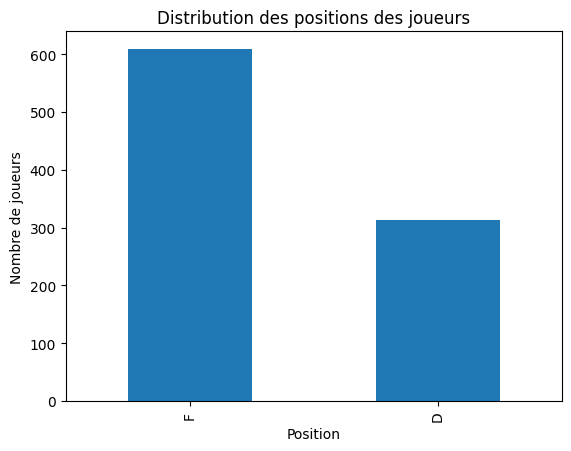

In [6]:

import matplotlib.pyplot as plt

# Tracer la distribution des positions
position_counts.plot(kind='bar')
plt.title('Distribution des positions des joueurs')
plt.xlabel('Position')
plt.ylabel('Nombre de joueurs')
plt.show()
    


## 2. Préparation des Données

Cette section couvre le processus de nettoyage des données, les techniques de prétraitement utilisées et le code source correspondant.
    


### 2.1 Nettoyage des Données

Les étapes suivantes ont été réalisées pour préparer le jeu de données :

Suppression des colonnes inutiles qui n'apportent pas d'informations pertinentes pour la prédiction du temps de glace moyen (TOI), comme le Rank, Team, ou certaines statistiques spécifiques comme PPP%.
Suppression des gardiens de but (positions marquées par "G"), car leurs statistiques sont très différentes de celles des joueurs de champ.
Gestion des valeurs manquantes en supprimant les lignes contenant des données manquantes pour éviter les biais.
Voici le code qui réalise ces opérations :
    

In [7]:

# Liste des colonnes à supprimer
columns_to_remove = [
    'Name', 'Team', 'Rk',  # Colonnes inutiles
    'ES', 'PP', 'SH',      # Statistiques spécifiques au temps de jeu
    'PPP%',                # Redondant avec PPP
    'G/GP', 'A/GP', 'P/GP',# Statistiques par match
    'G/60', 'A/60', 'P/60','ESG/60', 'ESA/60', 'ESP/60', 'PPG/60', 'PPA/60', 'PPP/60'  # Statistiques par 60 minutes
]

# Supprimer les colonnes inutiles
data_cleaned = data.drop(columns=columns_to_remove, errors='ignore')

# Supprimer les lignes avec des valeurs manquantes
data_cleaned = data_cleaned.dropna()
    


### 2.2 Techniques de Prétraitement

Nous appliquons la normalisation aux variables numériques et encodons les variables catégorielles (comme les positions).
    

In [8]:

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Convertir les colonnes de pourcentage en format numérique
data_cleaned['FO%'] = data_cleaned['FO%'].str.rstrip('%').astype('float') / 100
data_cleaned['SH%'] = data_cleaned['SH%'].str.rstrip('%').astype('float') / 100

# Mise à l'échelle des caractéristiques numériques
scaler = StandardScaler()
numerical_columns = [
    'GP', 'G', 'A', 'P', 'PIM', '+/-', 'HITS', 'BS', 'PPP', 'SHP', 'FOW', 'FOL', 'FO%', 'SH%'
]
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Encodage des variables catégorielles
label_encoder = LabelEncoder()
data_cleaned['Pos'] = label_encoder.fit_transform(data_cleaned['Pos'])
    


### 2.3 Création de Nouvelles Variables

Nous ajoutons des variables calculées é partir des données existantes pour améliorer le pouvoir prédictif du modéle, par exemple le ratio Buts/Passes.
    

In [9]:

# Créer une nouvelle variable pour le ratio Buts/Passes
data_cleaned['goal_assist_ratio'] = data_cleaned['G'] / (data_cleaned['A'] + 1)  # éviter la division par zéro
    


### 2.4 Jeu de Données Pré-traité

Nous affichons un aperçu des données après les étapes de prétraitement pour vérifier que tout est en ordre.
    

In [10]:

# Afficher les premières lignes des données pré-traitées
data_cleaned.head()
    

,Age,Pos,GP,G,A,P,PIM,+/-,TOI,ESG,...,GWP,OTP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%,goal_assist_ratio
0,30,1,1.028315,3.423765,5.547394,4.986276,-0.151997,0.711847,21:40,31,...,22,2,306.0,0.782349,-0.330635,-0.221294,-0.445197,-0.482814,1.033740,0.522920
1,28,1,1.062770,4.104028,4.831451,4.820705,0.659708,2.966965,22:48,41,...,25,6,404.0,0.552326,-0.162528,0.552506,2.989834,3.859944,0.876076,0.703775
2,26,1,0.856038,2.257600,5.547394,4.489565,0.172685,2.966965,21:21,24,...,22,4,263.0,0.501210,0.896548,-0.130258,2.053007,2.110521,1.079260,0.344809
3,32,1,1.062770,3.909667,3.659908,3.992854,-0.070826,1.547076,20:07,38,...,19,4,302.0,1.012372,-0.784525,-0.676470,-0.450875,-0.439694,-0.621533,0.839001
4,27,1,1.062770,3.715306,3.139222,3.578929,0.862634,1.797645,19:55,35,...,16,2,382.0,0.513989,0.089633,-0.585435,-0.411131,-0.396575,0.343905,0.897586



## 3. Analyse Exploratoire des Données (EDA)

Nous effectuons une analyse exploratoire pour comprendre les relations entre les différentes variables du jeu de données.
    


### 3.1 Statistiques Descriptives

Nous générons des statistiques descriptives pour résumer les variables numériques avant d'aller plus loin dans la modélisation.
    

In [11]:

# Statistiques descriptives
desc_stats = data_cleaned.describe()
desc_stats
    

,Age,Pos,GP,G,A,P,PIM,+/-,ESG,PPG,...,GWP,OTP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%,goal_assist_ratio
count,922.000000,922.000000,9.220000e+02,9.220000e+02,922.000000,922.000000,9.220000e+02,9.220000e+02,922.000000,922.000000,...,922.000000,922.000000,922.000000,9.220000e+02,9.220000e+02,9.220000e+02,9.220000e+02,9.220000e+02,9.220000e+02,922.000000
mean,26.713666,0.660521,-6.165230e-17,-6.165230e-17,0.000000,0.000000,3.082615e-17,1.541307e-17,6.714751,1.800434,...,3.601952,0.526030,86.151844,3.082615e-17,-3.082615e-17,3.082615e-17,3.082615e-17,-6.165230e-17,1.541307e-17,-3.664723
std,4.282430,0.473790,1.000543e+00,1.000543e+00,1.000543,1.000543,1.000543e+00,1.000543e+00,7.330271,3.401998,...,4.284269,1.070721,74.280411,1.000543e+00,1.000543e+00,1.000543e+00,1.000543e+00,1.000543e+00,1.000543e+00,7.203659
min,18.000000,0.000000,-1.728108e+00,-8.521731e-01,-0.961179,-0.974251,-1.044872e+00,-3.714867e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.057833e+00,-1.087118e+00,-1.017852e+00,-4.565529e-01,-4.951336e-01,-1.035351e+00,-21.951524
25%,23.000000,0.000000,-9.270229e-01,-7.549927e-01,-0.765922,-0.808681,-8.013602e-01,-4.574736e-01,1.000000,0.000000,...,0.000000,0.000000,23.000000,-6.361247e-01,-7.971329e-01,-7.162977e-01,-4.565529e-01,-4.951336e-01,-1.035351e+00,-3.225391
50%,26.000000,1.000000,3.392090e-01,-3.662711e-01,-0.310322,-0.311971,-2.331670e-01,-3.985908e-02,4.000000,0.000000,...,2.000000,0.000000,73.000000,-7.384680e-02,-2.549870e-01,-2.895701e-01,-4.395197e-01,-4.643339e-01,1.816887e-01,-0.480943
75%,30.000000,1.000000,9.249489e-01,4.111722e-01,0.470707,0.474488,4.567819e-01,3.777554e-01,10.000000,2.000000,...,5.000000,1.000000,131.750000,4.756521e-01,4.594688e-01,3.647457e-01,-2.237657e-01,-1.717367e-01,8.972839e-01,0.328846
max,40.000000,1.000000,1.097225e+00,5.853275e+00,5.547394,4.986276,5.164668e+00,4.720946e+00,51.000000,27.000000,...,25.000000,6.000000,404.000000,1.172121e+01,5.418633e+00,3.943569e+00,5.732181e+00,4.469778e+00,3.102832e+00,2.862085


### 3.2 Distribution des Variables Clés

Dans cette sous-section, nous allons explorer la distribution des principales variables numériques avant le prétraitement. La visualisation des distributions permet de comprendre la répartition des données et de détecter d'éventuelles anomalies ou valeurs extrêmes qui pourraient influencer les modèles de machine learning ultérieurement.

Les graphiques de distribution permettent d'observer la forme des distributions (normale, asymétrique, bimodale, etc.) et de mettre en évidence des caractéristiques importantes comme :
- **La centralité** : Où se situe la majorité des observations ?
- **La dispersion** : Quelle est l'étendue de la variation dans les données ?
- **Les éventuelles valeurs extrêmes (outliers)** : Sont-elles fréquentes ? Sont-elles concentrées à une extrémité ?


In [12]:
# Importer les bibliothèques nécessaires
import pandas as pd

# Charger et nettoyer les données
def load_and_clean_data(filepath):
    """
    Charger le jeu de données depuis Excel, supprimer les colonnes inutiles et filtrer les gardiens de but.

    """
    # Charger les données depuis Excel
    data = pd.read_excel(filepath)

    # Supprimer les lignes où 'Pos' est 'G' (Gardiens de but)
    data = data[data['Pos'] != 'G']

    # Liste des colonnes à supprimer
    columns_to_remove = [
        'Rk', 'Team',  # Valeurs non nécessaires
        'TOI', 'ES', 'PP', 'SH',  # Statistiques du temps de jeu
        'PPP%',  # Pourcentage de points en avantage numérique (redondant avec PPP)
        'G/GP', 'A/GP', 'P/GP',  # Statistiques par match
        'G/60', 'A/60', 'P/60', 'ESG/60', 'ESA/60', 'ESP/60', 'PPG/60', 'PPA/60', 'PPP/60'  # Statistiques par 60 minutes
    ]

    # Supprimer les colonnes inutiles
    data = data.drop(columns=columns_to_remove, errors='ignore')

    # Supprimer les lignes avec des valeurs manquantes
    data = data.dropna()

    return data

# Charger les données
input_filepath = "data/All_Skaters.xlsx" 
data = load_and_clean_data(input_filepath)


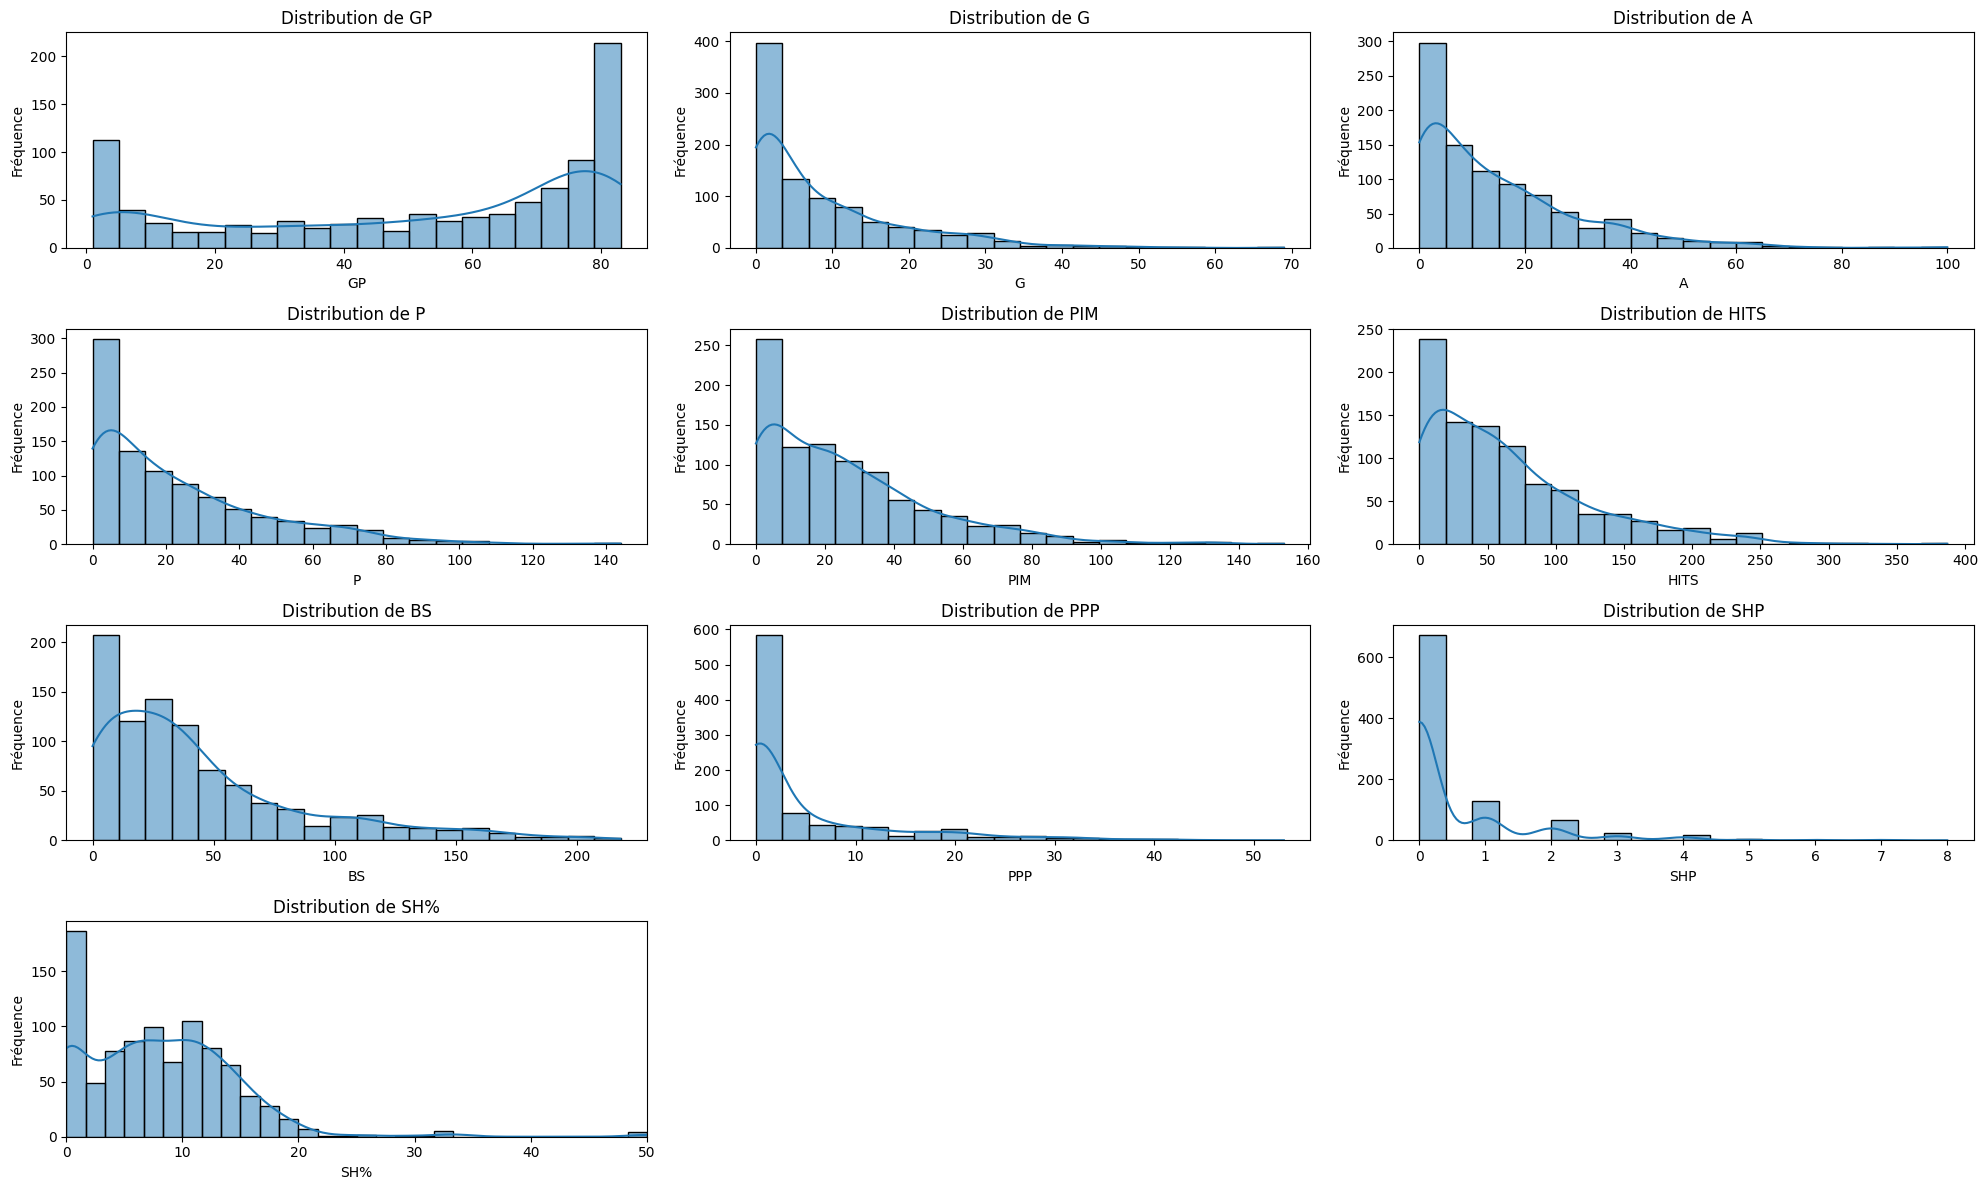

In [13]:
# Importer les bibliothèques nécessaires pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Liste des principales colonnes numériques à visualiser, excluant 'FO%'
numerical_columns = ['GP', 'G', 'A', 'P', 'PIM', 'HITS', 'BS', 'PPP', 'SHP', 'SH%']

# S'assurer que SH% est correctement converti au format numérique, si c'est au format chaîne avec un signe '%'
if data['SH%'].dtype == 'object':  # Vérifier si le type de données est un objet (probablement une chaîne)
    data['SH%'] = data['SH%'].str.rstrip('%').astype(float)  # Convertir SH% en float après avoir supprimé '%'

# Définir le nombre de lignes et de colonnes pour les sous-graphiques
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

# Configurer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))  # Ajuster la taille de la figure selon vos besoins
axes = axes.flatten()  # Aplatir les axes pour une itération plus facile

# Boucler sur les colonnes et tracer dans les sous-graphiques
for i, col in enumerate(numerical_columns):
    if col == 'SH%':
        # Filtrer les valeurs extrêmes pour SH% (se concentrer sur des valeurs réalistes comme 0% à 50%)
        filtered_data = data[data['SH%'] <= 50]
        sns.histplot(filtered_data['SH%'], bins=30, kde=True, ax=axes[i])
        axes[i].set_xlim(0, 50)  # Se concentrer sur la plage de 0% à 50%
    else:
        sns.histplot(data[col], bins=20, kde=True, ax=axes[i])

    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

# Supprimer les sous-graphiques inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajouter un espacement entre les graphiques
plt.tight_layout()

# Afficher le graphique combiné
plt.show()


### 3.3 Explication des Résultats 

#### GP (Parties Jouées)
La distribution des parties jouées montre un pic autour de 80 matchs, ce qui indique que de nombreux joueurs ont disputé une saison complète. Il y a relativement peu de joueurs ayant joué un nombre significativement inférieur de matchs.

#### G (Buts)
Cette distribution est asymétrique à droite, la majorité des joueurs ayant marqué moins de 10 buts. Quelques joueurs dépassent les 20 buts, mais cela reste rare.

#### A (Passes Décisives)
Semblable aux buts, les passes décisives sont aussi asymétriques à droite. La majorité des joueurs ont moins de 20 passes, avec quelques valeurs aberrantes à plus de 20 passes.

#### P (Points)
Les points, étant la somme des buts et des passes, montrent également une distribution asymétrique à droite. La majorité des joueurs accumulent moins de 40 points, bien que quelques-uns en aient beaucoup plus.

#### PIM (Minutes de Pénalité)
Les minutes de pénalité sont fortement asymétriques à droite. La majorité des joueurs accumulent très peu de pénalités, tandis que certains en accumulent beaucoup, probablement des joueurs plus physiques.

#### HITS (Mises en Échec)
La distribution des mises en échec est également asymétrique à droite, la plupart des joueurs ayant moins de 50 mises en échec. Quelques joueurs ont un nombre bien plus élevé, ce qui reflète peut-être leur style de jeu plus agressif.

#### BS (Tirs Bloqués)
Cette distribution montre que la plupart des joueurs bloquent peu de tirs, mais certains joueurs bloquent un nombre considérablement plus élevé, ce qui peut refléter leur rôle défensif.

#### PPP (Points en Supériorité Numérique)
La majorité des joueurs contribuent très peu aux points en supériorité numérique, ce qui est attendu, avec seulement quelques joueurs contribuant de manière significative à ces situations de jeu.

#### SHP (Points en Infériorité Numérique)
Les points en infériorité numérique sont rares, la majorité des joueurs ayant 0 point dans cette catégorie. Très peu de joueurs ont plus de 1 point, ce qui reflète la rareté de ces situations.

#### SH% (Pourcentage de Tirs)
La distribution du pourcentage de tirs montre que la plupart des joueurs ont un pourcentage inférieur à 20%. Quelques joueurs dépassent les 40%, ce qui pourrait indiquer leur efficacité dans un nombre limité d’opportunités de tir.



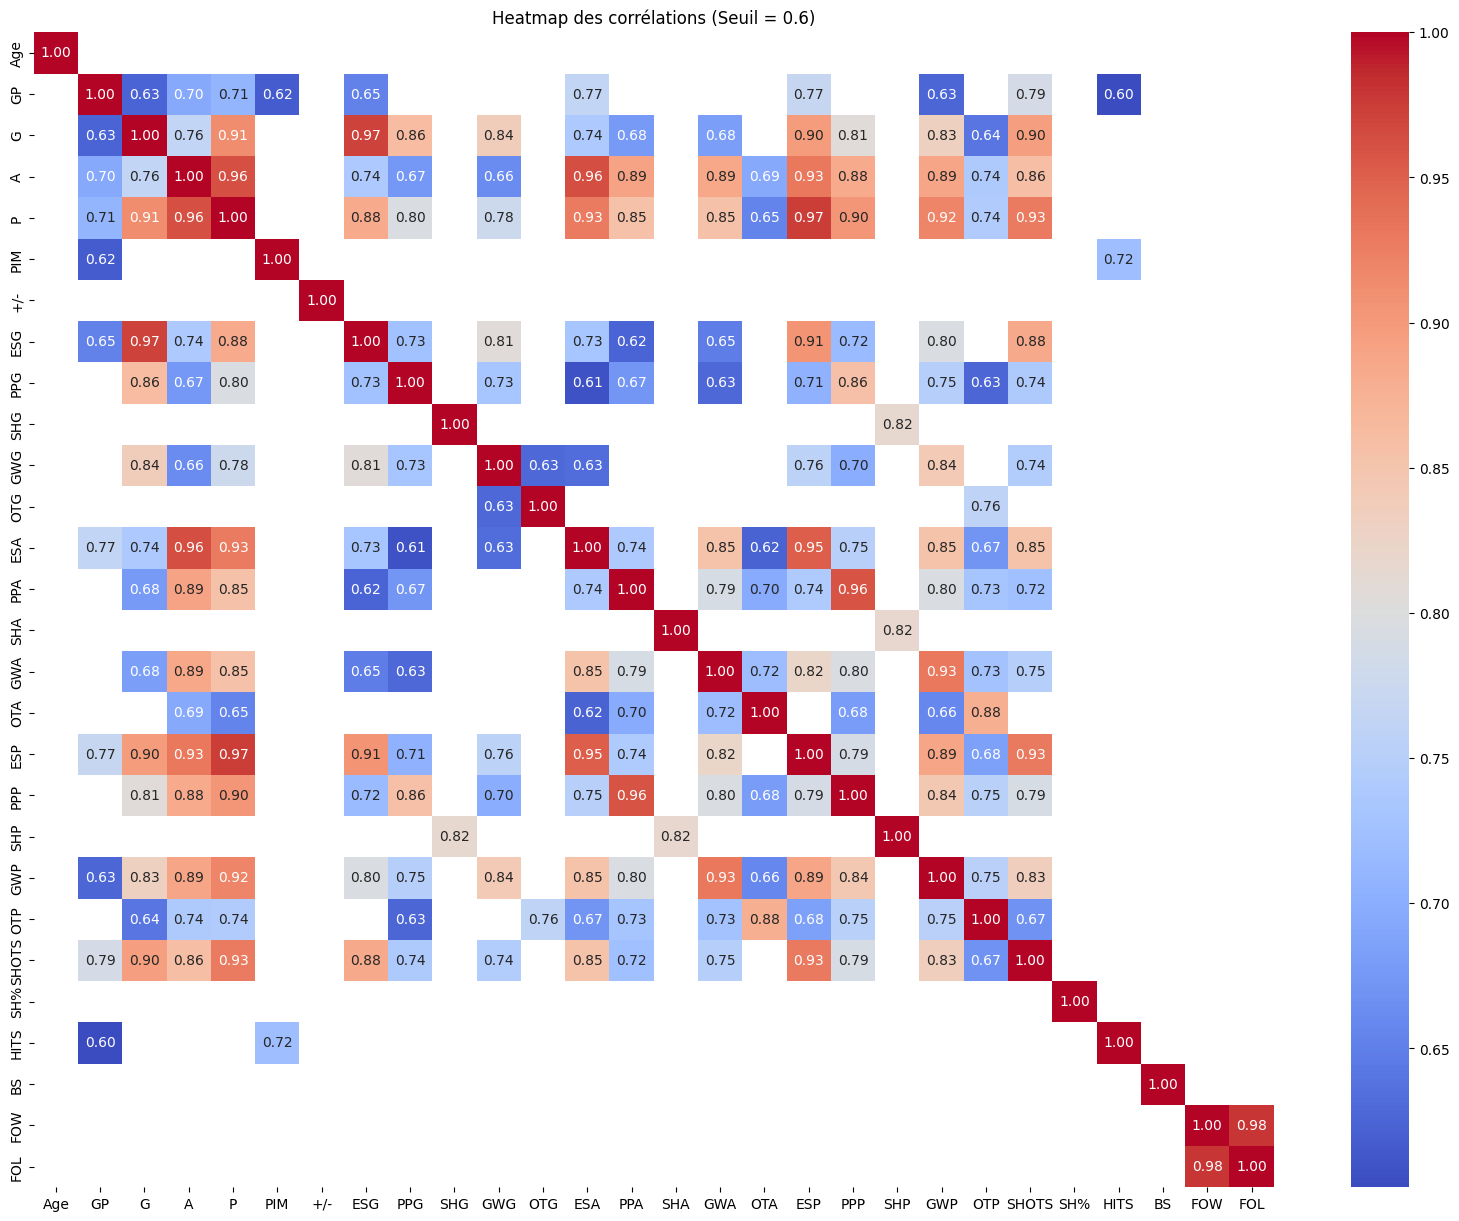

In [14]:
"""
Générer une carte thermique pour les corrélations des caractéristiques, en excluant les colonnes non numériques.
Affiche uniquement les corrélations au-dessus d'un certain seuil pour une meilleure lisibilité.

"""
# Filtrer les colonnes non numériques
numeric_data = data.select_dtypes(include=[float, int])

# Générer la matrice de corrélation pour les colonnes numériques uniquement
corr_matrix = numeric_data.corr()

# Appliquer le seuil (afficher uniquement les corrélations au-dessus ou en dessous du seuil)
mask = abs(corr_matrix) >= 0.6

# Tracer la heatmap avec le masque de seuil
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix[mask], annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title(f"Heatmap des corrélations (Seuil = {0.6})")
plt.show()


### Interprétation de la Heatmap de Corrélation

La heatmap montre la matrice de corrélation entre différentes variables avec un seuil de 0,6 pour identifier les corrélations significatives. La palette de couleurs représente la force de la corrélation, allant de -1 (corrélation négative parfaite, en bleu) à +1 (corrélation positive parfaite, en rouge). Les valeurs proches de 0 indiquent une faible corrélation ou l'absence de corrélation.

#### Explication des Corrélations

##### Corrélations Positives Fortes (Valeurs proches de +1, en rouge)
- **G (Buts)** et **P (Points)** : 0,91 – Corrélation très forte, car les buts contribuent directement aux points.
- **A (Passes)** et **P (Points)** : 0,90 – Corrélation très forte, car les passes décisives augmentent également le total des points.
- **EVP (Points à Égalité Numérique)** et **P (Points)** : 0,93 – Forte corrélation, indiquant que les points à égalité numérique constituent une part importante des points totaux.
- **PPP (Points en Supériorité Numérique)** et **P (Points)** : 0,88 – Corrélation forte, car les points en supériorité numérique sont également une composante des points totaux.
- **FOW (Engagements Gagnés)** et **FOL (Engagements Perdus)** : 0,98 – Corrélation très forte, car les joueurs qui participent à beaucoup d'engagements en gagnent et en perdent un nombre similaire.
- **FO%** (Non montré dans le graphique mais souvent corrélé avec les engagements gagnés/perdus) pourrait montrer une relation importante avec les variables FOW/FOL.

  
##### Autres Corrélations Intéressantes :
- **A (Passes)** et **G (Buts)** : 0,76 – Les joueurs qui accumulent beaucoup de passes ont tendance à marquer plus de buts.
- **SH% (Pourcentage de Tirs)** et **G (Buts)** : 0,74 – Une corrélation modérée, ce qui est attendu puisque les joueurs avec un pourcentage de tirs plus élevé marquent généralement plus de buts.
- **HITS (Mises en Échec)** et **PIM (Minutes de Pénalité)** : 0,62 – Corrélation modérée, suggérant que les joueurs avec plus de mises en échec ont tendance à accumuler plus de minutes de pénalité.

##### Résumé :
Les corrélations les plus fortes sont observées entre les variables qui mesurent des aspects liés, comme les buts et les points, ou les engagements gagnés/perdus. Il existe aussi des corrélations modérées qui révèlent des tendances intéressantes, comme l'impact des minutes de pénalité sur le différentiel de buts (+/-) ou le lien entre les mises en échec et les minutes de pénalité. Ces relations doivent être prises en compte lors de l'analyse des performances des joueurs et de la création de modèles prédictifs.


# 4. Explication de la Recherche du Meilleur Modèle

Pour trouver le modèle de régression le plus performant pour notre projet, nous avons décidé d'essayer plusieurs algorithmes de régression différents et de les ajuster avec des recherches d'hyperparamètres afin de trouver les meilleures configurations possibles pour chacun. Voici les étapes que nous avons suivies :

### 1. Chargement et Préparation des Données
Nous avons d'abord chargé et préparé les données, puis nous avons transformé la colonne `TOI` (temps sur glace) au format `MM:SS` en minutes totales pour l'utiliser comme variable cible (`y`). Les autres colonnes ont été utilisées comme caractéristiques (`X`).

### 2. Division des Données en Entraînement et Test
Ensuite, nous avons divisé nos données en un ensemble d'entraînement (80 %) et un ensemble de test (20 %), afin de pouvoir évaluer les performances des modèles sur des données non vues.



In [15]:
import pandas as pd

# Chargement des données prétraitées
def load_data(filepath):
    """Charger le dataset prétraité à partir du fichier CSV."""
    return pd.read_csv(filepath)

# Charger les données
data = load_data('data/Cleaned_Skaters.csv')

# Transformer la colonne 'TOI' (Temps de glace) au format MM:SS en minutes totales
data['TOI'] = data['TOI'].apply(
    lambda x: sum(int(i) * 60 ** index for index, i in enumerate(reversed(x.split(':')))) / 60)

# Séparer les caractéristiques (X) et la cible (y)
X = data.drop(columns=['TOI'])
y = data['TOI']

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4.1. Ajustement des Modèles de Régression
Nous avons utilisé les algorithmes de régression suivants :
- **Random Forest Regressor**
- **Support Vector Regression (SVR)**
- **XGBoost Regressor**
- **Gradient Boosting Regressor**
- **AdaBoost Regressor**
- **Ridge Regression**

Pour chacun de ces modèles, nous avons appliqué **GridSearchCV** afin de trouver les meilleurs hyperparamètres. La grille d'hyperparamètres a été soigneusement sélectionnée pour chaque modèle, couvrant des paramètres tels que :
- **n_estimators** (nombre d'arbres),
- **learning_rate** (taux d'apprentissage),
- **max_depth** (profondeur maximale des arbres),
- **C** (paramètre de régularisation pour SVR),
- **alpha** (paramètre de régularisation pour Ridge Regression), etc.


### Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Ajustement des hyperparamètres pour Random Forest avec GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf,
                                cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print(f"Meilleurs paramètres pour Random Forest: {grid_search_rf.best_params_}")



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs paramètres pour Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


### Support Vector Regression (SVR)

In [17]:
from sklearn.svm import SVR

# Ajustement des hyperparamètres pour SVR avec GridSearchCV
param_grid_svr = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}
grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search_svr.fit(X_train, y_train)
print(f"Meilleurs paramètres pour SVR: {grid_search_svr.best_params_}")



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres pour SVR: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


### XGBoost Regressor

In [18]:
from xgboost import XGBRegressor


param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb,
                                cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
print(f"Meilleurs paramètres pour XGBoost: {grid_search_xgb.best_params_}")
  


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Meilleurs paramètres pour XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


### Gradient Boosting Regressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

# Ajustement des hyperparamètres pour Gradient Boosting avec GridSearchCV

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]
}
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb,
                                cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print(f"Meilleurs paramètres pour Gradient Boosting: {grid_search_gb.best_params_}")



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs paramètres pour Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


### AdaBoost Regressor

In [20]:
from sklearn.ensemble import AdaBoostRegressor

# Ajustement des hyperparamètres pour AdaBoost avec GridSearchCV

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
grid_search_ada = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid_ada,
                                cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_ada.fit(X_train, y_train)
print(f"Meilleurs paramètres pour AdaBoost: {grid_search_ada.best_params_}")



Fitting 5 folds for each of 9 candidates, totalling 45 fits
Meilleurs paramètres pour AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}


### Ridge Regression

In [21]:
from sklearn.linear_model import Ridge

# Ajustement des hyperparamètres pour Ridge Regression avec GridSearchCV
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]
}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)
print(f"Meilleurs paramètres pour Ridge Regression: {grid_search_ridge.best_params_}")



Fitting 5 folds for each of 4 candidates, totalling 20 fits
Meilleurs paramètres pour Ridge Regression: {'alpha': 10}


### 4.2 Meilleurs Paramètres Trouvés

Voici les meilleurs hyperparamètres trouvés pour chaque modèle :

- **Ridge Regression** : `{'alpha': 10}`
- **AdaBoost** : `{'learning_rate': 0.1, 'n_estimators': 50}`
- **Gradient Boosting** : `{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}`
- **XGBoost** : `{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}`
- **SVR** : `{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}`
- **Random Forest** : `{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}`


### 4.3. Évaluation des Modèles

Après avoir ajusté les hyperparamètres, nous avons évalué la performance de chaque modèle en calculant les métriques suivantes :

- **Erreur quadratique moyenne (MSE)**
- **Coefficient de détermination (R²)**
- **Erreur quadratique moyenne racine (RMSE)**


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Fonction pour entraîner et évaluer les modèles
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcul des métriques
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mse ** 0.5  # Calcul de RMSE

    print(f"Modèle: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")
    print(f"Root Mean Squared Error: {rmse}")
    print("-" * 40)

# Entraînement et évaluation des modèles
def main():
    models = [
        (LinearRegression(), "Linear Regression"),
        (Ridge(alpha=10), "Ridge Regression"),
        (RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2, bootstrap=True, random_state=42), "Random Forest"),
        (SVR(C=1, gamma='scale', kernel='linear'), "Support Vector Regression (SVR)"),
        (AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42), "AdaBoost"),
        (GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=42), "Gradient Boosting"),
        (XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.8, colsample_bytree=0.8, random_state=42), "XGBoost")
    ]
    
    for model, model_name in models:
        train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name)

main()


Modèle: Linear Regression
Mean Squared Error: 4.39939950466287
R² Score: 0.7660748209296162
Root Mean Squared Error: 2.0974745539965127
----------------------------------------
Modèle: Ridge Regression
Mean Squared Error: 4.449896409914698
R² Score: 0.7633897959413164
Root Mean Squared Error: 2.1094777576250237
----------------------------------------
Modèle: Random Forest
Mean Squared Error: 4.064892846840568
R² Score: 0.7838612324042691
Root Mean Squared Error: 2.0161579419382223
----------------------------------------
Modèle: Support Vector Regression (SVR)
Mean Squared Error: 4.347911108880762
R² Score: 0.7688125655219432
Root Mean Squared Error: 2.085164528012301
----------------------------------------
Modèle: AdaBoost
Mean Squared Error: 5.336766607485149
R² Score: 0.7162330715840561
Root Mean Squared Error: 2.310144282828488
----------------------------------------
Modèle: Gradient Boosting
Mean Squared Error: 3.856914557867437
R² Score: 0.7949198685747798
Root Mean Squared Er

### Interprétation
- **Gradient Boosting** a obtenu les meilleurs résultats avec un **Mean Squared Error (MSE)** de 3.857 et un **R² Score** de 0.795, ce qui en fait le modèle le plus performant pour notre jeu de données.
- **Random Forest** a également obtenu de bons résultats avec un **MSE** de 4.065 et un **R²** de 0.784.
- **AdaBoost** s'est révélé être le moins performant avec un **MSE** de 5.337 et un **R² Score** de 0.716, indiquant que ce modèle n'est pas aussi adapté à notre jeu de données comparé aux autres.
- **Support Vector Regression (SVR)** et **XGBoost** ont montré des performances intermédiaires, mais sont toujours bien adaptés à notre problème.
- **Ridge Regression** et **Linear Regression** ont montré des performances similaires, mais légèrement inférieures à celles des modèles basés sur les arbres comme Random Forest ou Gradient Boosting.

### Conclusion
Sur la base de ces résultats, **Gradient Boosting** semble être le modèle le plus performant pour prédire le **temps sur glace (TOI)** des joueurs, suivi de près par **Random Forest**. Nous pouvons envisager d'utiliser se modèle.

## 5. Analyse Finale et Résumé des Modifications du Modèle

Dans cette section, nous suivons plusieurs étapes pour optimiser notre modèle prédictif, identifier les variables qui impactent le plus le temps de glace, et réduire le nombre de variables utilisées tout en maintenant une performance élevée.

### 5.1 Utilisation du Gradient Boosting pour Identifier les Caractéristiques Importantes

Nous utilisons l'algorithme de Gradient Boosting pour déterminer les 10 caractéristiques les plus importantes influençant le temps de glace moyen (TOI) des joueurs. Le modèle est entraîné sur l'ensemble de données d'entraînement, et l'importance des caractéristiques est évaluée. Les caractéristiques les plus influentes sont sélectionnées afin d'affiner notre modèle.



Classement des 10 principales caractéristiques avant suppression des corrélées :
1. Caractéristique A (0.34005874572439804)
2. Caractéristique BS (0.15472782031332216)
3. Caractéristique Pos (0.11553273727385154)
4. Caractéristique SHOTS (0.050755636458524094)
5. Caractéristique PPP (0.04195187588021906)
6. Caractéristique P (0.03878670265092141)
7. Caractéristique PPA (0.03797520326378665)
8. Caractéristique GP (0.03577277757338439)
9. Caractéristique Age (0.0335716644523581)
10. Caractéristique OTP (0.019927287263093337)


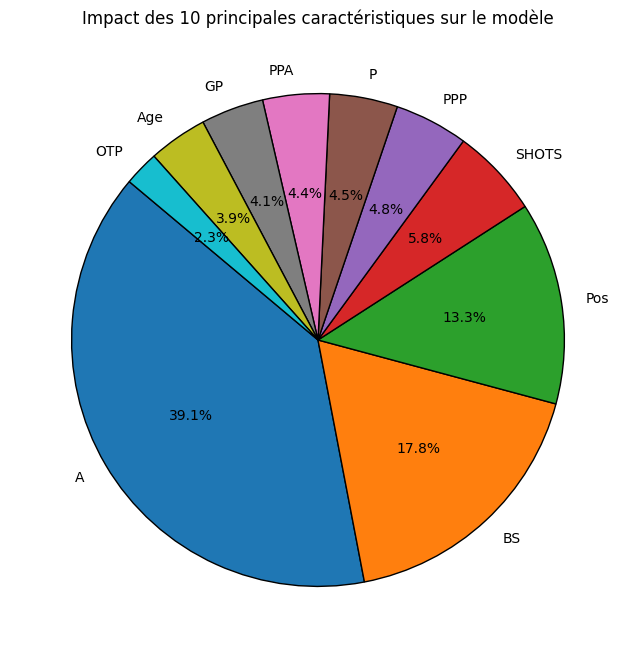

In [23]:
import numpy as np

# Entraîner le modèle de Gradient Boosting
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8)
model.fit(X_train, y_train)

# Obtenir l'importance des caractéristiques
importances = model.feature_importances_

# Trier les importances des caractéristiques et les caractéristiques correspondantes
indices = np.argsort(importances)[::-1]

# Obtenir les 10 principales caractéristiques
top_10_indices = indices[:10]
top_10_features = X_train.columns[top_10_indices]
top_10_importances = importances[top_10_indices]

# Afficher le classement des caractéristiques avant la suppression des corrélées
print("Classement des 10 principales caractéristiques avant suppression des corrélées :")
for i in range(10):
    print(f"{i + 1}. Caractéristique {top_10_features[i]} ({top_10_importances[i]})")

# Tracer un diagramme circulaire pour les 10 principales importances des caractéristiques
plt.figure(figsize=(8, 8))
plt.pie(top_10_importances, labels=top_10_features, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Impact des 10 principales caractéristiques sur le modèle')
plt.show()


### 5.2 Identification et Suppression des Caractéristiques Corrélées

Après avoir identifié les 10 caractéristiques les plus importantes, nous vérifions les corrélations entre elles. Certaines caractéristiques, telles que **ESA** (Even Strength Assists) et **PPA** (Power Play Assists), présentent une corrélation élevée (supérieure à 0.92), ce qui peut entraîner une redondance dans le modèle. Par conséquent, nous retirons ces caractéristiques pour éviter les problèmes de multicolinéarité et améliorer la robustesse du modèle.



In [24]:
# Calculer la matrice de corrélation pour les 10 principales caractéristiques
corr_matrix = data[top_10_features].corr()

# Définir un seuil de corrélation (par exemple, supérieur à 0.92)
threshold = 0.92

# Trouver les paires de caractéristiques fortement corrélées
high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns
                   if i != j and abs(corr_matrix.loc[i, j]) > threshold]

print("\nCaractéristiques fortement corrélées parmi les 10 principales (au-dessus du seuil) :")
for pair in high_corr_pairs:
    print(f"{pair[0]} et {pair[1]} avec une corrélation de : {corr_matrix.loc[pair[0], pair[1]]}")

# Supprimer les caractéristiques corrélées en fonction de l'analyse préalable (par exemple, 'ESA' et 'PPA')
features_to_remove = ['ESA', 'PPA']
final_features = [f for f in top_10_features if f not in features_to_remove]

print("\nCaractéristiques finales utilisées pour la modélisation après suppression des corrélées :")
print(final_features)



Caractéristiques fortement corrélées parmi les 10 principales (au-dessus du seuil) :
A et P avec une corrélation de : 0.961552727315786
SHOTS et P avec une corrélation de : 0.928320587928706
PPP et PPA avec une corrélation de : 0.9581875968443986
P et A avec une corrélation de : 0.961552727315786
P et SHOTS avec une corrélation de : 0.928320587928706
PPA et PPP avec une corrélation de : 0.9581875968443986

Caractéristiques finales utilisées pour la modélisation après suppression des corrélées :
['A', 'BS', 'Pos', 'SHOTS', 'PPP', 'P', 'GP', 'Age', 'OTP']


### 5.3 Entraînement et Évaluation du Modèle Réduit

Nous réentraînons le modèle de Gradient Boosting avec les caractéristiques restantes, après avoir retiré les variables fortement corrélées. Les performances du modèle réduit sont évaluées pour vérifier si elles restent comparables, tout en cherchant à améliorer l'efficacité computationnelle et à réduire la complexité.

Les résultats de l'évaluation du modèle incluent :
- **Erreur Quadratique Moyenne (MSE)** : Indique la différence moyenne au carré entre les valeurs prédites et les valeurs réelles du TOI.
- **Erreur Quadratique Moyenne Racine (RMSE)** : Offre une interprétation directe de l'erreur en termes d'unités du TOI.
- **Score R²** : Mesure de la proportion de variance expliquée par le modèle, indiquant sa capacité prédictive.


In [25]:
# Préparer les ensembles d'entraînement et de test avec les caractéristiques réduites
X_train_reduced = X_train[final_features]
X_test_reduced = X_test[final_features]

# Entraîner à nouveau le modèle de Gradient Boosting avec les caractéristiques réduites
model_reduced = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8)
model_reduced.fit(X_train_reduced, y_train)

# Prédire et évaluer le modèle
y_pred = model_reduced.predict(X_test_reduced)
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = model_reduced.score(X_test_reduced, y_test)

# Afficher les métriques d'évaluation
print(f"\nÉvaluation du modèle avec les caractéristiques réduites :")
print(f"Erreur Quadratique Moyenne (MSE) : {mse}")
print(f"Erreur Quadratique Moyenne Racine (RMSE) : {rmse}")
print(f"Score R² : {r2}")



Évaluation du modèle avec les caractéristiques réduites :
Erreur Quadratique Moyenne (MSE) : 4.5924499069047195
Erreur Quadratique Moyenne Racine (RMSE) : 2.143000211596984
Score R² : 0.7558099313995406


### 5.4 Résumé des Modifications du Modèle

1. Nous utilisons l'algorithme de **Gradient Boosting** pour identifier les 10 caractéristiques les plus importantes.
2. Nous procédons à la **suppression des caractéristiques corrélées** (ESA et PPA) pour améliorer la robustesse du modèle.
3. Nous réentraînons un **nouveau modèle** avec les caractéristiques restantes afin d'obtenir un modèle plus compact et efficace.
4. Nous travaillons sur l'**amélioration de l'interprétabilité** du modèle grâce à la réduction du nombre de variables. Cependant nous avons observer une chute d'environ 0.05% avec les modifications. Un sacrifice qui peut valoir la peine si on veut passer de 20 variables à uniquement 8.

Ces étapes visent à optimiser notre approche de modélisation et à produire un modèle final performant et facile à interpréter.


## 6. Conclusion

Ce projet visait à prédire le temps moyen de glace (TOI) des joueurs de hockey à l'aide de diverses métriques de performance en utilisant des modèles de machine learning. Tout au long du processus, nous avons réalisé les étapes suivantes :

1. **Analyse des données et préparation** : Nous avons exploré les données pour comprendre la structure et la distribution des variables. Les données ont été nettoyées, transformées et les caractéristiques les plus pertinentes ont été sélectionnées.

2. **Modélisation** : Plusieurs algorithmes de régression ont été testés, notamment la régression linéaire, le Ridge, les forêts aléatoires, le SVR, l'AdaBoost, le Gradient Boosting, et XGBoost. Le Gradient Boosting a montré les meilleurs résultats avec un bon équilibre entre complexité et précision.

3. **Réduction des caractéristiques** : Nous avons utilisé les techniques d'importance des caractéristiques pour identifier les variables les plus influentes. Les caractéristiques fortement corrélées ont été supprimées afin d'améliorer la robustesse et de simplifier le modèle, ce qui a conduit à une légère diminution de la performance mais a permis de réduire le nombre de variables de 20 à 8.

4. **Évaluation finale** : Les modèles ont été évalués à l'aide de métriques telles que le MSE, le RMSE et le R². Les résultats montrent que la réduction du nombre de variables n'a pas significativement compromis la précision du modèle, tout en améliorant sa simplicité et sa capacité à être interprété.

### Leçons apprises et perspectives futures

- **Simplicité vs Précision** : Nous avons constaté que réduire la complexité d'un modèle peut entraîner une perte minime de précision, mais permet d'obtenir un modèle plus facile à interpréter et potentiellement plus rapide à exécuter.
- **Analyse des caractéristiques** : L'identification des caractéristiques les plus importantes s'est révélée être une étape cruciale pour améliorer les performances du modèle. En utilisant des techniques de réduction de dimensions, nous avons pu renforcer l'interprétabilité.
- **Améliorations futures** : Il serait intéressant d'explorer d'autres techniques de régularisation ou d'intégrer des interactions non linéaires entre les variables. De plus, une optimisation plus poussée des hyperparamètres pourrait potentiellement améliorer les performances.

En conclusion, ce projet démontre l'efficacité de l'apprentissage automatique pour prédire des résultats dans un contexte sportif, tout en soulignant l'importance de la sélection des caractéristiques et de la simplification du modèle.
